In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading


In [3]:
#Load data 
#Expectes data to be in the same directory as the notebook in a folder called 'archive'
path_book_data = "archive/books_data.csv"
path_book_ratings = "archive/Books_rating.csv"
bd = pd.read_csv(path_book_data)
br = pd.read_csv(path_book_ratings)



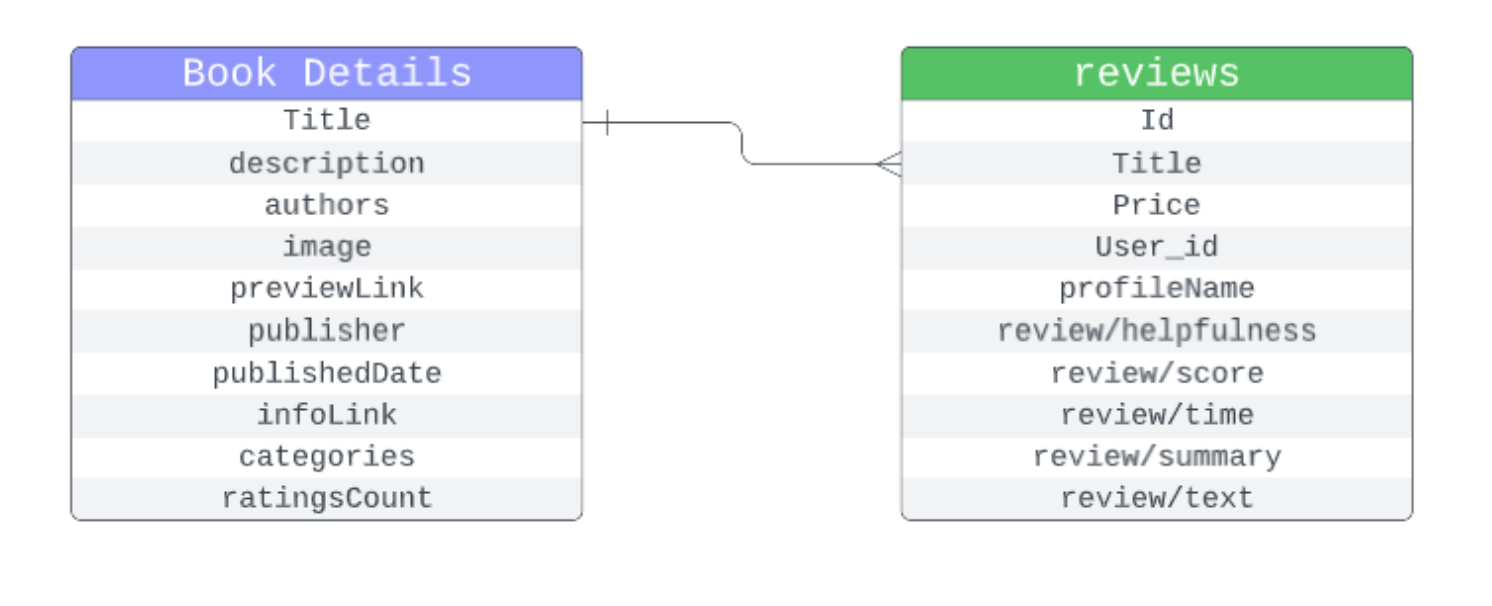


In [4]:
# print all column names of bd
print(list(br.columns))

['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']


## Data Exploration

In [5]:
# 3 Million reviews in total 
br.info()
# Check for missing values in key columns
print(str(br['review/score'].isna().sum()) + ' missing values in review/score')
print(str(br['review/summary'].isna().sum()) + ' missing values in review/summary')
print(str(br['review/text'].isna().sum()) + ' missing values in review/text')
print(str(br['User_id'].isna().sum()) + ' missing values in review/text')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
0 missing values in review/score
407 missing values in review/summary
8 missing values in review/text
561787 missing values in review/text


In [6]:
#Check the missing or empty review texts
#Seem all but one to be about lord of the rings and have exactly the same summary
missing_or_empty = br[br['review/text'].isna() | (br['review/text'].str.strip() == '')]
print(f"Number of entries with missing or empty review text: {len(missing_or_empty)}")
missing_or_empty


Number of entries with missing or empty review text: 8


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
469860,B000GQK706,The Lord of the Rings - Boxed Set,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1139849,B000I1VJLA,The Lord of the Rings Box Set,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1368032,B000J1OR0Y,The Lord of the Rings (3 Volume Set),NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1598329,B000PIIMPW,The Lord of the Rings Trilogy (The Fellowship ...,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
1771566,1562802372,The Drive,NaN,A32VJTCIVOG88D,Fire,1/1,5.0,1136678400,Beautiful and Honest - read it 4 times so far,NaN
1923523,B000BI4160,The Lord of the Rings Trilogy: Three Volumes i...,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
2584461,B000H7EO2G,The Lord of the Rings Trilogy 3 Volumes,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN
2895564,B000FAIRN2,The Lord Of The Rings THREE VOLUME BOXED SET (...,NaN,NaN,NaN,0/1,5.0,938563200,have only one word to say read ths book,NaN


In [7]:
# Drop rows missing either text or rating
br = br.dropna(subset=['review/text', 'review/score'])

print(f"\nAfter dropping missing Text/Score: {len(br)} rows remain.")


After dropping missing Text/Score: 2999992 rows remain.


In [8]:
br['review/score'].value_counts()

review/score
5.0    1807335
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: count, dtype: int64

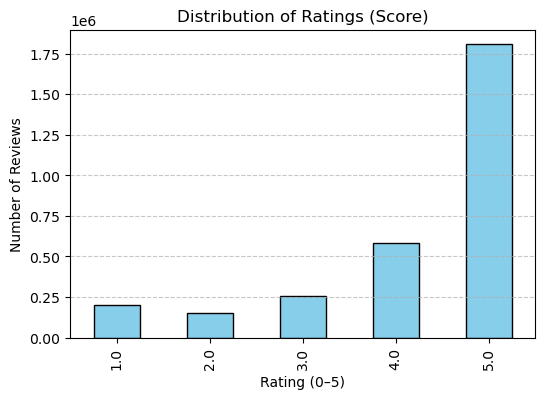

In [9]:
#plot distribution of review scores
plt.figure(figsize=(6,4))
br['review/score'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Ratings (Score)")
plt.xlabel("Rating (0–5)")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
#How many unique books are there?
unique_books = br['Id'].nunique()
print(f"Number of unique books in the dataset: {unique_books}")

Number of unique books in the dataset: 221998


In [11]:
#How many reviews per book are there on average?
reviews_per_book = br.groupby('Id').size()
reviews_per_book.describe()

count    221998.000000
mean         13.513599
std          76.173249
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max        6796.000000
dtype: float64

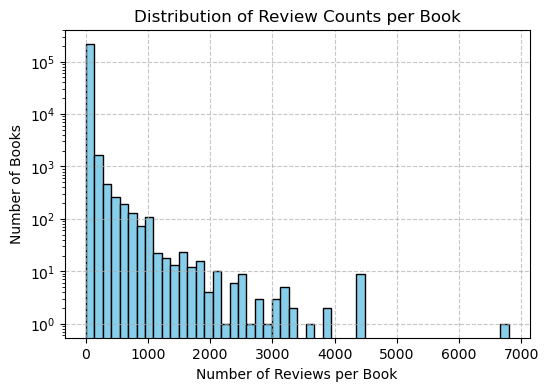

In [12]:
plt.figure(figsize=(6,4))
plt.hist(reviews_per_book, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Counts per Book")
plt.xlabel("Number of Reviews per Book")
plt.ylabel("Number of Books")
plt.yscale('log')  # log scale to handle skew
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [13]:
# Review length ditribution
# Compute review lengths in words
br['review_length'] = br['review/text'].apply(lambda x: len(str(x).split()))
print(br['review_length'].describe())

count    2.999992e+06
mean     1.436134e+02
std      1.631682e+02
min      1.000000e+00
25%      4.800000e+01
50%      9.200000e+01
75%      1.770000e+02
max      6.810000e+03
Name: review_length, dtype: float64


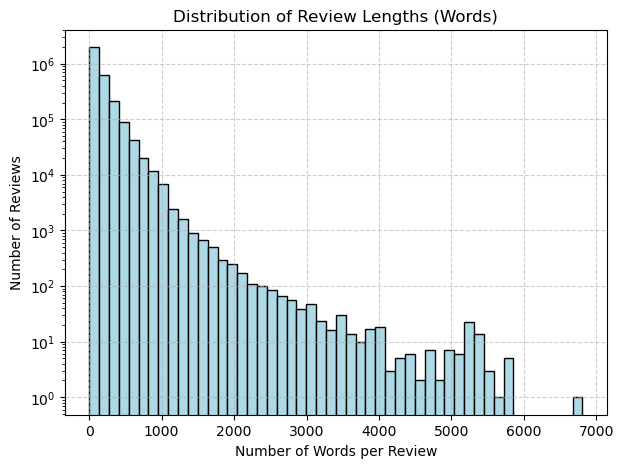

In [14]:
# Notice log scale for y-axis due to skewed distribution!!!
plt.figure(figsize=(7,5))
plt.hist(br['review_length'], bins=50, color='lightblue', edgecolor='black')
plt.title("Distribution of Review Lengths (Words)")
plt.xlabel("Number of Words per Review")
plt.ylabel("Number of Reviews")
plt.yscale('log')  
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
# How many reviews are very short (e.g., less than 5 words)?
short_reviews = br[br['review_length'] < 5]
print(f"Number of reviews with less than 5 words: {len(short_reviews)}")
one_word_reviews = br[br['review_length'] < 2]
print(f"Number of reviews with just one words: {len(one_word_reviews)}")

Number of reviews with less than 5 words: 1281
Number of reviews with just one words: 226


In [16]:
#print reviews that are just one word
print(one_word_reviews['review/text'].unique())

['PROPHETIC!' 'yes' '1' 'Why' 'oooooooooooookkkkk' 'Fantastic' '1,00'
 'histor' 'afadfd' 'HAHAHHAH696' 'oka' 'HUH' 'ee' 'asdas' 'fdsafd' 'w'
 'wonderful!!' 'terribl' 'tes' 'Decen' 'END' 'excellen' 'Fabulous!!'
 '&agrave;&uacute;&eacute;&agrave;&uacute;&aacute;&ograve;&iacute;&auml;&agrave;&ugrave;&auml;&aacute;&eacute;&igrave;&agrave;&uacute;&eacute;&agrave;&uacute;&eacute;&aacute;&ugrave;&aacute;&ugrave;&aacute;&ntilde;&eacute;&eacute;&ograve;&igrave;&eacute;&igrave;&ouml;&agrave;&agrave;&uacute;&eacute;&aacute;&ograve;&igrave;&iacute;&igrave;&igrave;&uacute;&aacute;&uacute;&eacute;&agrave;&uacute;&auml;&uacute;&ugrave;&auml;&uacute;&ograve;&igrave;&uacute;&eacute;&eacute;&iacute;&aacute;&igrave;&igrave;&auml;&ugrave;&ograve;&auml;&ntilde;&aacute;&eacute;&aacute;&uacute;&eacute;&uacute;&ograve;&ugrave;&agrave;&uacute;&eacute;&agrave;&uacute;&auml;&eacute;&eacute;&uacute;&eacute;&ograve;&aacute;&ntilde;&eacute;&iacute;&auml;&igrave;&auml;&egrave;&igrave;&ugrave;&eacute;&ugrave;&agrave;

In [19]:
#Inspect long review
long_reviews = br[br['review_length'] > 5000]
print(long_reviews[['review/text']])

                                               review/text
108920   *This review, needless to say, is long. It is ...
112970   While I agree for the most part with the autho...
142289   The only conspiracies here have to do with the...
148610   This is the Second Book in Fomenko's seven boo...
199161   THE WEATHER MAKERS: HOW MAN IS CHANGING THE CL...
227476   Why write a review of a book that was first pu...
244431   *This review, needless to say, is long. It is ...
258769   Charles OsborneThe Complete Operas of Puccini:...
440293   HamletThe Characters in the PlayGhost of Hamle...
473860   For centuries, Christian believers have drawn ...
533172   I could write this review in just a few senten...
581126   *This review, needless to say, is long. It is ...
581453   Please click on "see all my reviews" to see th...
624451   *This review, needless to say, is long. It is ...
629817   The Rise of the West - McNeillBibliographical ...
753910   HamletThe Characters in the PlayGhost of Hamle.